In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Asegurarse de que las imágenes tengan la forma correcta
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.  # Normalización
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.    # Normalización

# Convertir etiquetas a formato one-hot
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


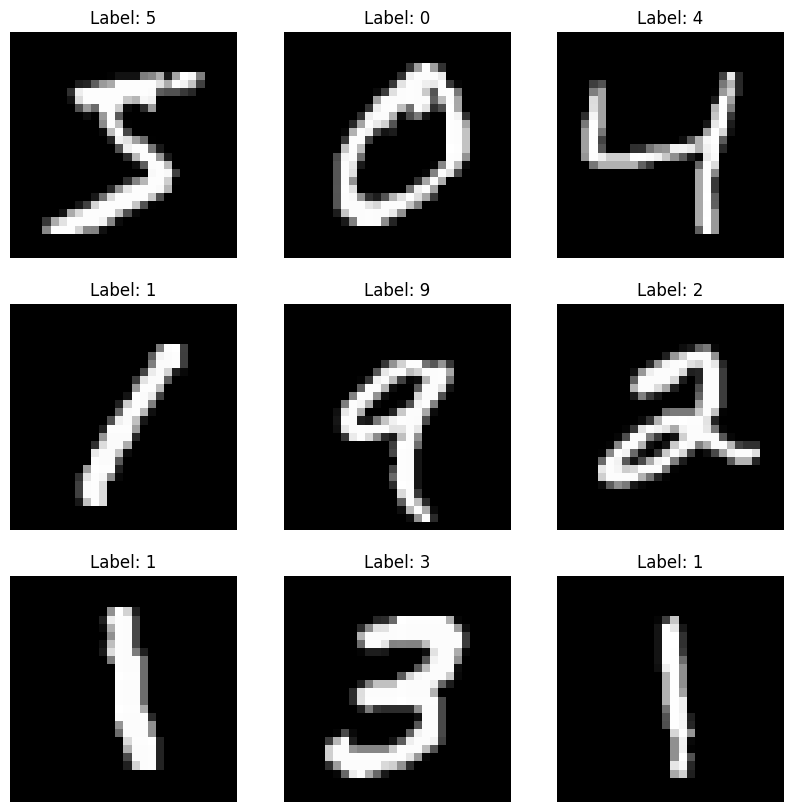

In [3]:
# Visualización de algunas imágenes del dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()


In [4]:
# Definir la arquitectura del modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8388 - loss: 0.4939 - val_accuracy: 0.9743 - val_loss: 0.0816
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.9809 - loss: 0.0642 - val_accuracy: 0.9838 - val_loss: 0.0539
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9874 - loss: 0.0406 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9875 - val_loss: 0.0432
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9867 - val_loss: 0.0434


In [9]:
# Guardar el modelo
model.save('mnist_cnn_model.keras')


  8/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step  

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


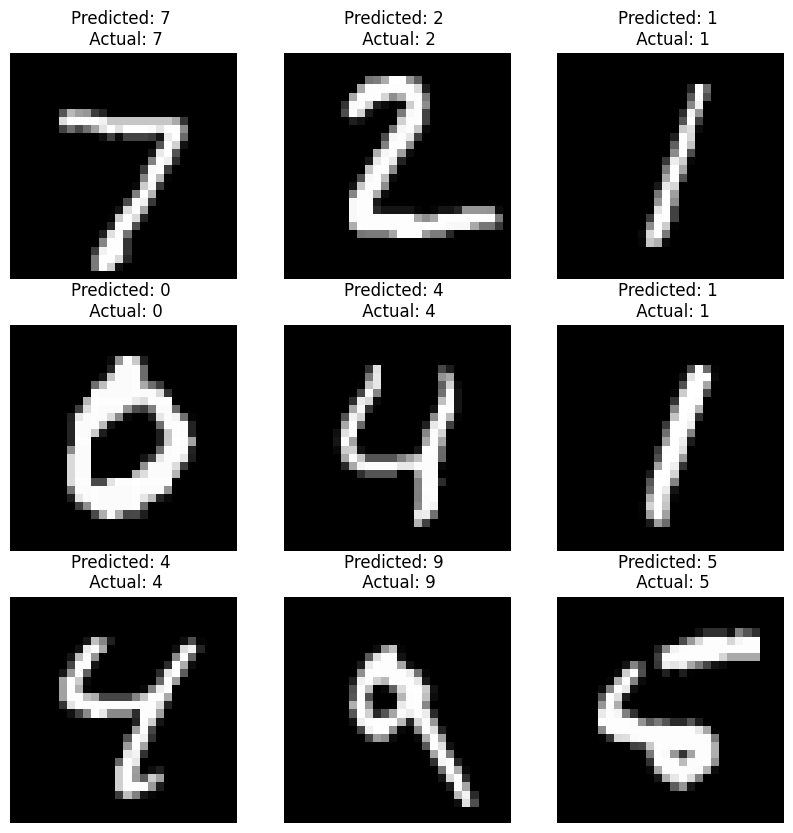

In [10]:
# Cargar el modelo
model = keras.models.load_model('mnist_cnn_model.keras')

# Hacer predicciones
predictions = model.predict(test_images)

# Visualizar algunas predicciones
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} \n Actual: {np.argmax(test_labels[i])}")
    plt.axis('off')
plt.show()


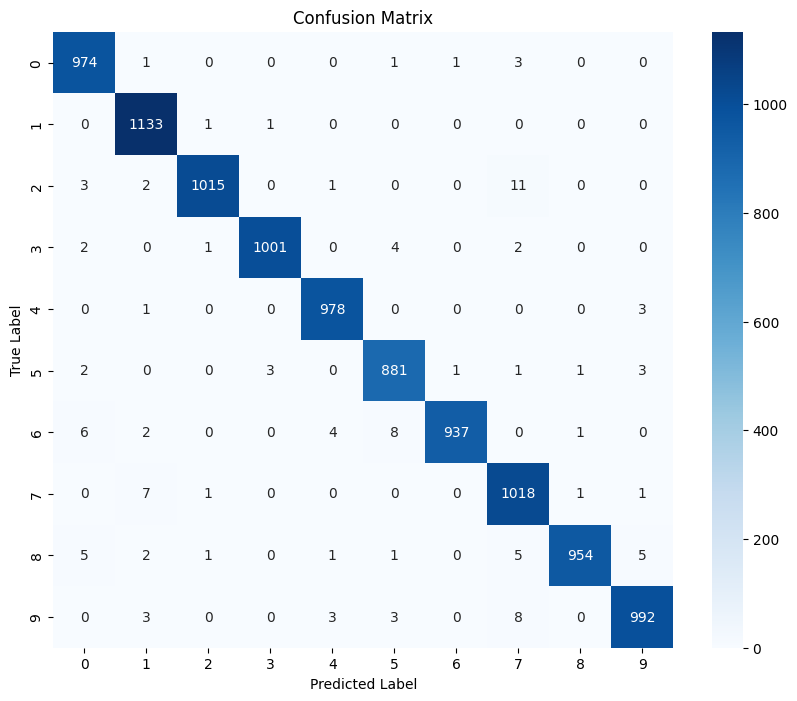

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
# Calcular la matriz de confusión
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generar un reporte de clasificación
print(classification_report(y_true, y_pred))
